# Predicting Adversiting Dataset Using Decision Tree(Project Id : 1)


# Importing all necessary packages.


In [73]:

%matplotlib inline

from sklearn.tree import plot_tree,DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
from math import sqrt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:
import graphviz
from sklearn.tree import export_graphviz

# Model type : Regression

# Reading the dataset 

In [75]:
#reading dataset from user by using pandas library
df_raw = pd.read_csv(r"D:\PROJECT 1\advertising.csv.xls")

In [76]:
#prints first five rows of the extracted dataset
df_raw.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [77]:
#prints last five rows of dataset
df_raw.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [78]:
#gives information about dataset suc as size,data type used
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [79]:
df_raw.describe()
#describes the properties of dataset such as mean standard deviation, minimum and maximum value

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [80]:
df_raw.isnull()
#checks wheather dataset has null value or not

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [81]:
True in df_raw.isnull()
#checks wheather dataset has null value or not if found any null value returns true else false

False

In [82]:
df_raw.shape#gives the shape of dataset in (rows,columns) format

(200, 4)

# Finding corelation among features

In [83]:
 df_raw.corr()#corelation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


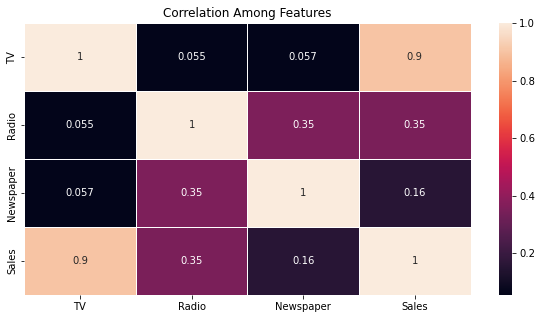

In [84]:
#Correlation Among Features using matplotlib
plt.figure(figsize=(10,5))
plt.title("Correlation Among Features")
sns.heatmap(df_raw.corr(),linewidths=1,annot=True)
plt.show()

# Visualizing the dataset

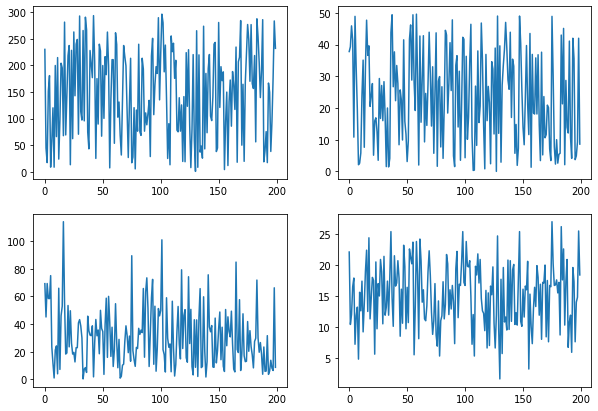

In [85]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
plt.plot(df_raw.iloc[:,0])
plt.subplot(2,2,2)
plt.plot(df_raw.iloc[:,1])
plt.subplot(2,2,3)
plt.plot(df_raw.iloc[:,2])
plt.subplot(2,2,4)
plt.plot(df_raw.iloc[:,3])
plt.show()
        

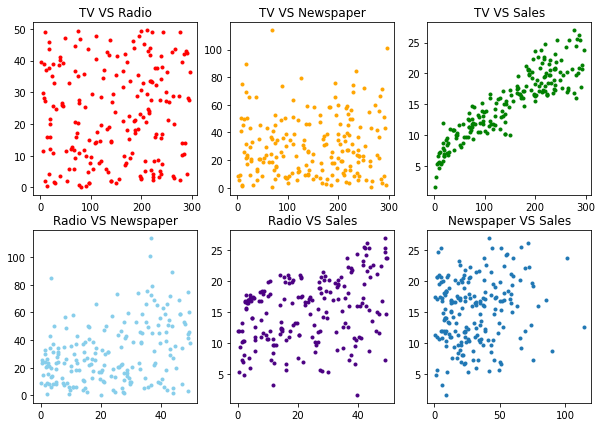

In [86]:
plt.figure(figsize=(10,7))
plt.subplot(2,3,1)
plt.title(df_raw.columns.values[0]+" VS "+df_raw.columns.values[1])
plt.scatter(df_raw.iloc[:,0],df_raw.iloc[:,1],c='r',marker='.')
plt.subplot(2,3,2)
plt.title(df_raw.columns.values[0]+" VS "+df_raw.columns.values[2])
plt.scatter(df_raw.iloc[:,0],df_raw.iloc[:,2],c='orange',marker='.')
plt.subplot(2,3,3)
plt.title(df_raw.columns.values[0]+" VS "+df_raw.columns.values[3])
plt.scatter(df_raw.iloc[:,0],df_raw.iloc[:,3],c='green',marker='.')
plt.subplot(2,3,4)
plt.title(df_raw.columns.values[1]+" VS "+df_raw.columns.values[2])
plt.scatter(df_raw.iloc[:,1],df_raw.iloc[:,2],marker='.',c='skyblue')
plt.subplot(2,3,5)
plt.title(df_raw.columns.values[1]+" VS "+df_raw.columns.values[3])
plt.scatter(df_raw.iloc[:,1],df_raw.iloc[:,3],marker='.',c='indigo')

plt.subplot(2,3,6)
plt.title(df_raw.columns.values[2]+" VS "+df_raw.columns.values[3])
plt.scatter(df_raw.iloc[:,2],df_raw.iloc[:,3],marker='.')
plt.show()

# FINDING Root Mean Square Error(RMSE)

In [87]:
# Scoring function, we use rmse(root mean square error)

def score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

#  Extracting  the target variable from train dataset


In [88]:
# Extract the target variable from train dataset

y = df_raw['Sales']
df_raw.drop('Sales', axis=1, inplace=True)

In [89]:
def bestfit(X_train, X_valid, y_train, y_valid):
    def ele(v):
        return v[2]
    diff=[]
    for i in range(3,11):
        for j in range(10,0,-1):
            model1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j, random_state=3)
            model1.fit(X_train, y_train)
            train=score(y_train, model1.predict(X_train)) 
            test=score(y_valid, model1.predict(X_valid))
            d=abs(test-train)
            diff.append([i,j,d,train,test])
    diff.sort(key=ele)
    for i in diff:
        if(diff[0][2]==i[2]):
            print(i)

In [90]:
for i in np.arange(0.1,0.6,0.1):
    X_train, X_valid, y_train, y_valid = train_test_split(df_raw, y, test_size=i, shuffle=True,random_state=3)
    print("Test_size= ",i)
    bestfit(X_train, X_valid, y_train, y_valid)

Test_size=  0.1
[5, 5, 0.0048296557811531304, 1.065349877531159, 1.0605202217500058]
Test_size=  0.2
[4, 10, 0.05209358472435199, 1.5041266484468085, 1.5562202331711605]
Test_size=  0.30000000000000004
[4, 6, 0.51744438637115, 1.2474277795404476, 1.7648721659115976]
Test_size=  0.4
[4, 1, 0.3877470272413759, 1.0847587996597001, 1.472505826901076]
Test_size=  0.5
[4, 5, 0.6911150735006544, 1.1891558138896694, 1.8802708873903238]


# Split train data into train and validation data using train_test_split function

In [91]:
# Split train data into train and validation data using train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_raw, y, test_size=0.2, shuffle=True,random_state=3)

In [92]:
model1 = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=3)
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=3)

## Training score

In [93]:
score(y_train, model1.predict(X_train))  #training score

1.5041266484468085

## Validation score

In [94]:
score(y_valid, model1.predict(X_valid)) # Validation score

1.5562202331711605

In [96]:
y_pred=model1.predict(X_valid)
y_pred

array([18.34285714, 12.26315789, 22.88421053, 18.34285714, 10.42777778,
       10.42777778, 22.88421053, 12.26315789, 18.34285714, 16.93333333,
       18.34285714, 12.74      , 16.93333333, 12.74      , 12.26315789,
       16.93333333, 18.34285714, 15.8       , 18.34285714, 22.88421053,
       18.34285714, 12.26315789,  7.83846154, 12.74      , 10.42777778,
       12.74      , 22.88421053, 16.93333333, 19.748     , 12.74      ,
       15.8       , 22.88421053,  5.08      , 12.26315789, 10.42777778,
       12.26315789, 18.34285714,  7.83846154, 12.26315789, 12.26315789])

In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred)

1.2422031553242079

# Actual vs Prediction

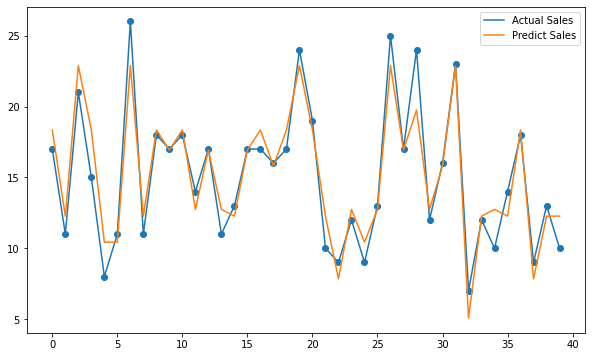

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_valid)), round(y_valid))
plt.plot(range(len(y_valid)),round(y_valid),label='Actual Sales')
plt.plot(range(len(y_valid)), model1.predict(round(X_valid)),label='Predict Sales')
plt.legend()
plt.show()

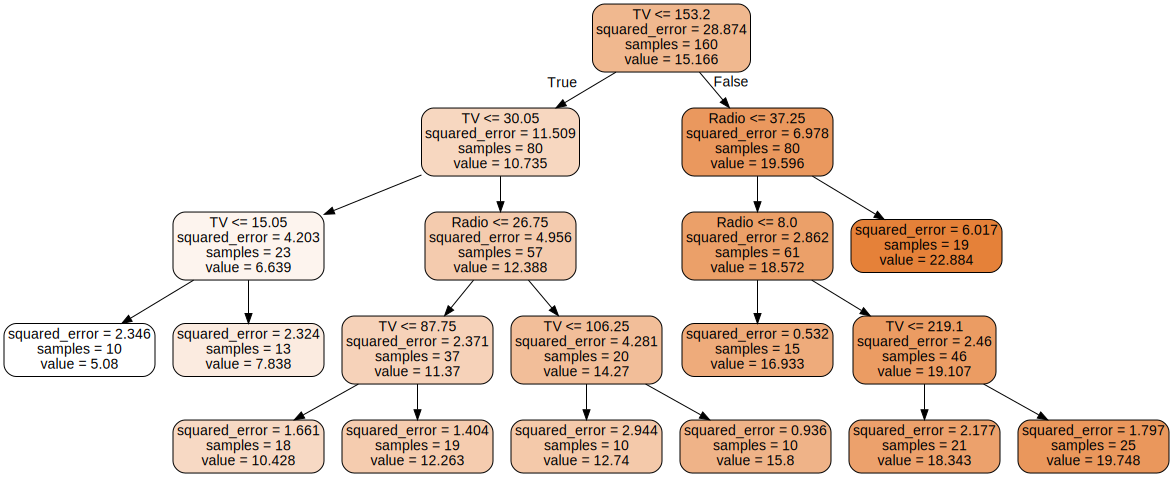

In [99]:
dot_data = export_graphviz(model1, 
                           feature_names=df_raw.columns.values,
                           class_names=y.values, 
                           filled=True, impurity=True, 
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph


# LINEAR REGRESSION

In [100]:
 from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [101]:
score(y_train,reg.predict(X_train))  #training score

1.7020447131061336

In [102]:
score(y_valid, reg.predict(X_valid)) #Validation Score

1.410740219667045

In [103]:
y_pred=reg.predict(X_valid)
y_pred

array([17.99747206, 11.02863798, 19.14207387, 15.16467067,  8.56496638,
       10.89550601, 24.92202604, 10.61757023, 18.6998404 , 17.29854871,
       14.66680343, 13.03094656, 19.28219899, 10.98418026, 13.7677926 ,
       14.4988402 , 16.92235556, 17.30704485, 17.78993353, 21.29009711,
       19.23977212, 10.98691684,  9.77272715, 11.18064352,  8.34136167,
       13.13093624, 21.59478295, 17.04191764, 24.83365506, 11.62133637,
       16.22765284, 21.95021111,  9.21285178,  9.94421377,  9.82032335,
       10.22691037, 15.74967394,  9.51795157, 13.67254607, 12.42186513])

In [104]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_valid, y_pred)
mse

1.9901879673862228

In [105]:
import math
rmse=math.sqrt(mse)
rmse

1.410740219667045

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred)

1.0436595481340791

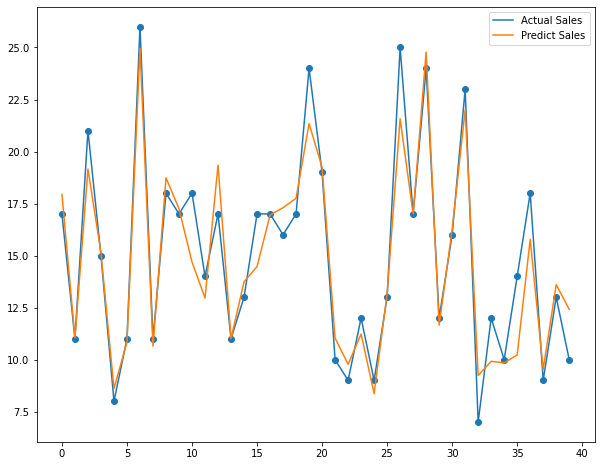

In [113]:
plt.figure(figsize=(10,8))
plt.scatter(range(len(y_valid)), round(y_valid))
plt.plot(range(len(y_valid)),round(y_valid),label='Actual Sales')
plt.plot(range(len(y_valid)),reg.predict(round(X_valid)),label='Predict Sales')
plt.legend()
plt.show()

# RANDOM FOREST

In [107]:
from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor = RandomForestRegressor(max_depth=4, min_samples_leaf=10, random_state=3)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=10, random_state=3)

In [108]:
y_pred1=regressor.predict(X_valid)
y_pred1

array([18.29821365, 12.16799665, 22.62260215, 17.62936067,  9.83800023,
       11.88506146, 22.82882172, 11.98256642, 18.52089602, 17.39461375,
       17.63726118, 12.82927705, 17.67419254, 10.07576   , 12.8530297 ,
       17.03347127, 18.18367287, 18.0373613 , 18.25577415, 22.75722898,
       18.6112291 , 12.14837008,  7.14085895, 10.66291499,  9.88926525,
       13.90326055, 22.75722898, 17.42822323, 20.86415675, 13.04552264,
       14.62965391, 22.74740073,  6.76104273, 12.09940367, 10.02206964,
       12.09940367, 17.77359678,  7.52630622, 12.60199153, 12.57756133])

In [109]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_valid, y_pred1)
mse

1.98165569709071

In [110]:
import math
rmse=math.sqrt(mse)
rmse

1.4077129313502488

In [111]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_valid, y_pred)

1.0436595481340791

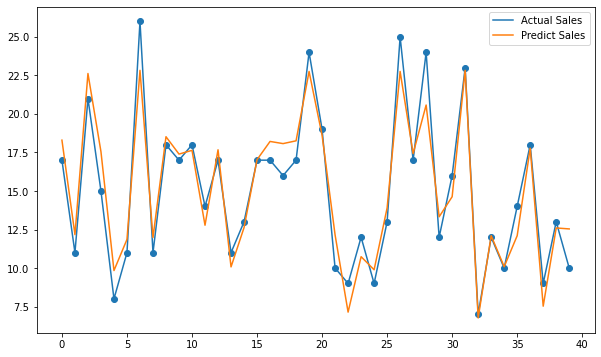

In [114]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_valid)), round(y_valid))
plt.plot(range(len(y_valid)),round(y_valid),label='Actual Sales')
plt.plot(range(len(y_valid)), regressor.predict(round(X_valid)),label='Predict Sales')
plt.legend()
plt.show()